The Trading Strategy The basic idea behind the strategy is to identify companies that are potentially undervalued by the market but are still managing to
generate high returns on equity. The mechanics of the strategy are simple: Stock Selection: We screen for stocks within the S&P 500 with a P/B ratio of
less than 2 and an ROE greater than 15%. Investment Thesis: The selected stocks are likely undervalued but efficient in generating profits. By investing in
these stocks, we anticipate that the market will eventually correct the pricing mismatch, leading to price appreciation. Trading Logic: We take a long
position in these selected stocks and monitor the portfolio’s performance over time.


In [73]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [74]:
# Fetch S&P 500 stocks
sp500_wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_df = pd.read_html(sp500_wiki_url)[0]
stocks = sp500_df['Symbol'].tolist()

print(f'Total S&P 500 stocks: {len(stocks)}')


Total S&P 500 stocks: 503


In [75]:
# Extract Fundamental Data for S&P 500 stocks
fundamentals_df = pd.DataFrame(columns=['stock', 'pb', 'roe'])
fundamentals_df['stock'] = stocks

for i, stock in enumerate(fundamentals_df['stock']):
    try:
        ticker = yf.Ticker(stock)
        pb = ticker.info.get('priceToBook', None)
        roe = ticker.info.get('returnOnEquity', None)
        fundamentals_df.at[i, 'pb'] = pb
        fundamentals_df.at[i, 'roe'] = roe
        print(f'{i}. {stock} finished')
    except Exception as e:
        print(f'{i}. {stock} Error: {e}')

0. MMM finished
1. AOS finished
2. ABT finished
3. ABBV finished
4. ACN finished
5. ADBE finished
6. AMD finished
7. AES finished
8. AFL finished
9. A finished
10. APD finished
11. ABNB finished
12. AKAM finished
13. ALB finished
14. ARE finished
15. ALGN finished
16. ALLE finished
17. LNT finished
18. ALL finished
19. GOOGL finished
20. GOOG finished
21. MO finished
22. AMZN finished
23. AMCR finished
24. AEE finished
25. AAL finished
26. AEP finished
27. AXP finished
28. AIG finished
29. AMT finished
30. AWK finished
31. AMP finished
32. AME finished
33. AMGN finished
34. APH finished
35. ADI finished
36. ANSS finished
37. AON finished
38. APA finished
39. AAPL finished
40. AMAT finished
41. APTV finished
42. ACGL finished
43. ADM finished
44. ANET finished
45. AJG finished
46. AIZ finished
47. T finished
48. ATO finished
49. ADSK finished
50. ADP finished
51. AZO finished
52. AVB finished
53. AVY finished
54. AXON finished
55. BKR finished
56. BALL finished
57. BAC finished
58. BK f

In [76]:
# Filter and sort stocks
fundamentals_df['pb'] = pd.to_numeric(fundamentals_df['pb'], errors='coerce')
fundamentals_df['roe'] = pd.to_numeric(fundamentals_df['roe'], errors='coerce')
top10_stocks = fundamentals_df[(fundamentals_df.pb < 2) & (fundamentals_df.roe > 0.15)].nlargest(100, 'roe')
print(top10_stocks)

# Extract and plot historical data for selected stocks
historical_data = pd.DataFrame()

# Define the file path where you want to save the Excel file
file_path = 'top10_stocks.xlsx'

# Write the top10_stocks DataFrame to an Excel file
fundamentals_df.to_excel(file_path, index=False)


     stock        pb      roe
38     APA  1.771004  0.79380
200    FMC  1.715443  0.36833
41    APTV  1.650657  0.34971
462    UAL  1.409560  0.32209
96      CE  1.851643  0.28254
181     EG  1.189208  0.23433
427   STLD  1.897263  0.22783
221     GL  1.801271  0.22686
467    VLO  1.706500  0.21823
148   FANG  1.881377  0.21342
431    SYF  1.343065  0.20775
109   CINF  1.666768  0.18070
349    NUE  1.598772  0.17630
120  CMCSA  1.856343  0.17489
374    PSX  1.831578  0.16921
106     CB  1.902130  0.16756
269    JPM  1.955434  0.16545
289    LEN  1.816835  0.15964


[*********************100%%**********************]  1 of 1 completed


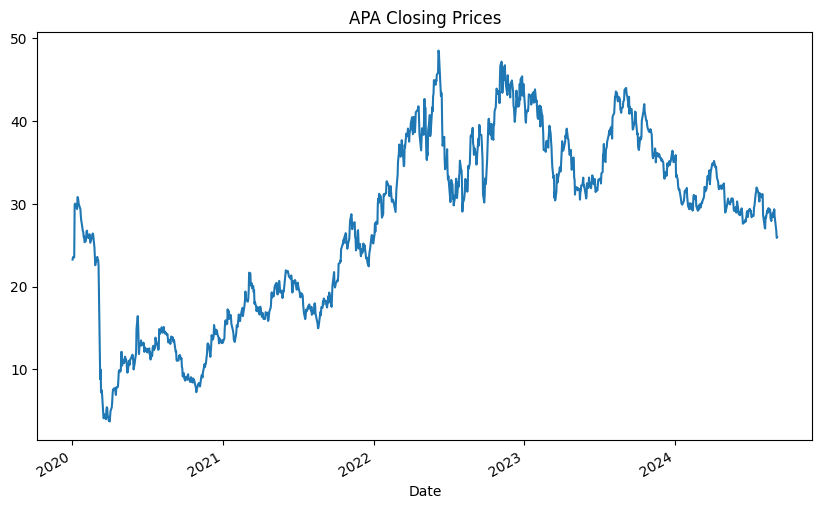

APA historical data downloaded


[*********************100%%**********************]  1 of 1 completed


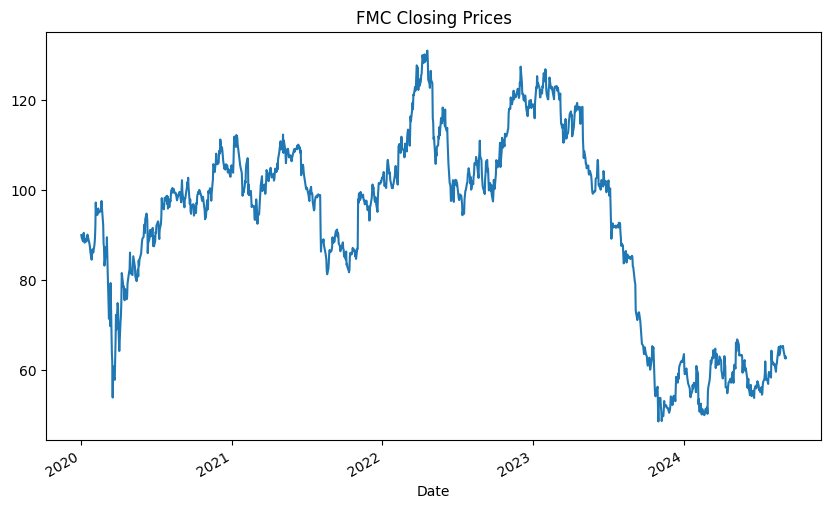

FMC historical data downloaded


[*********************100%%**********************]  1 of 1 completed


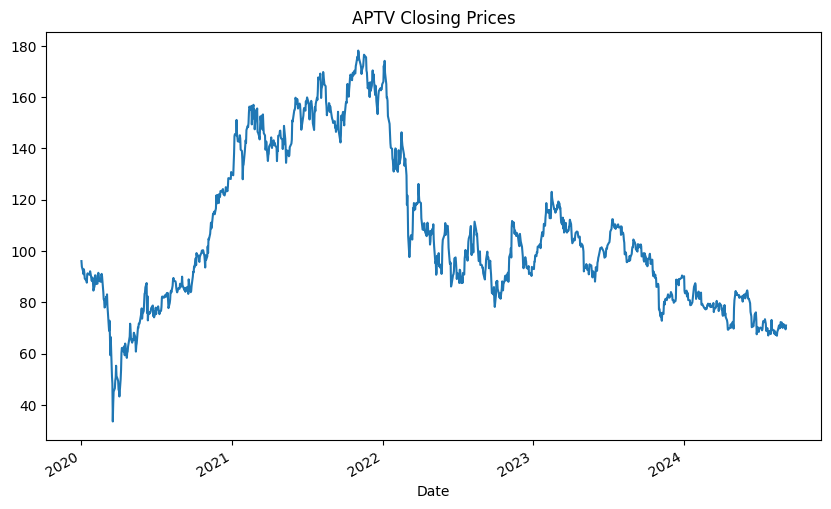

APTV historical data downloaded


[*********************100%%**********************]  1 of 1 completed


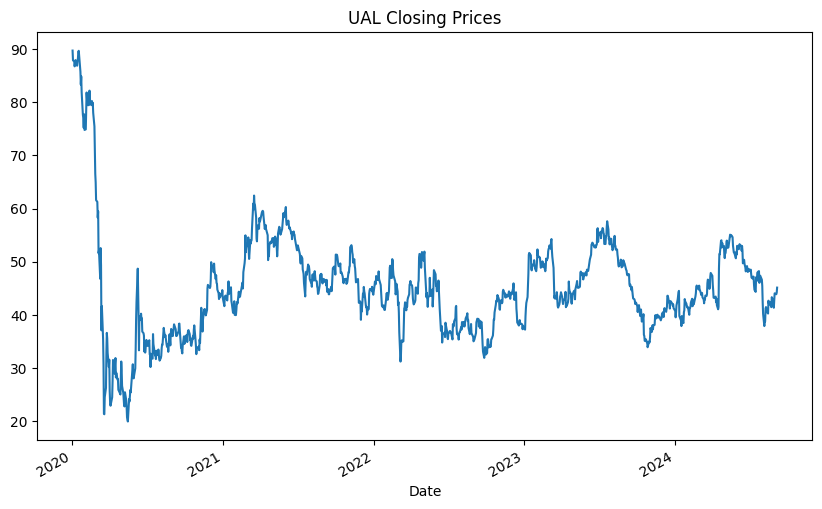

UAL historical data downloaded


[*********************100%%**********************]  1 of 1 completed


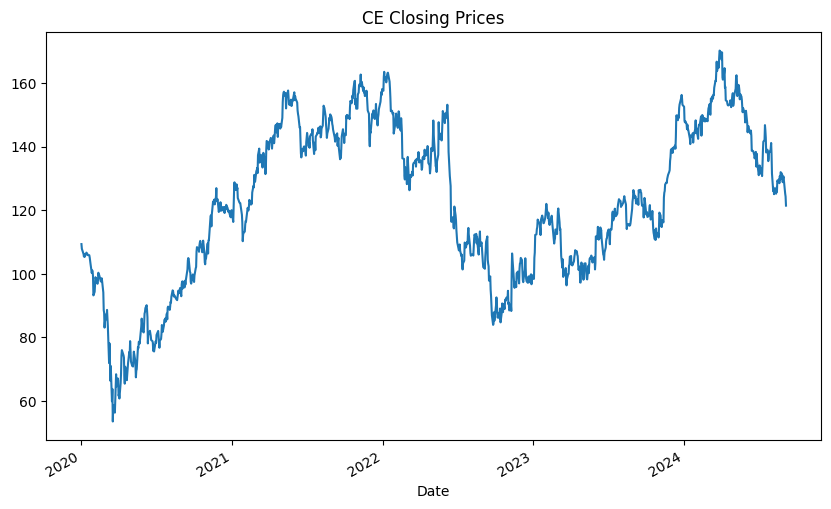

CE historical data downloaded


[*********************100%%**********************]  1 of 1 completed


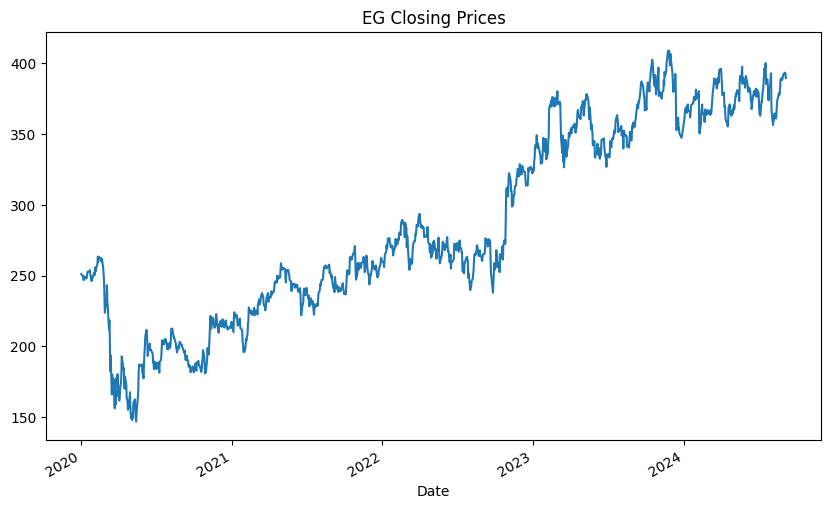

EG historical data downloaded


[*********************100%%**********************]  1 of 1 completed


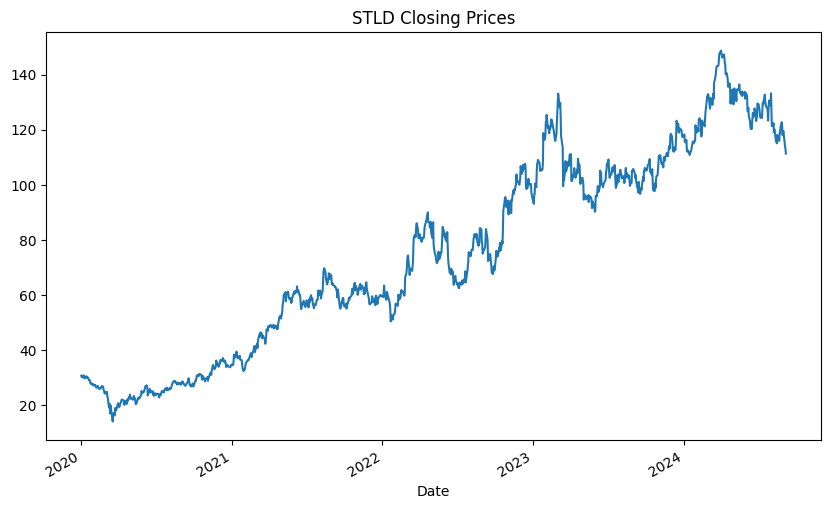

STLD historical data downloaded


[*********************100%%**********************]  1 of 1 completed


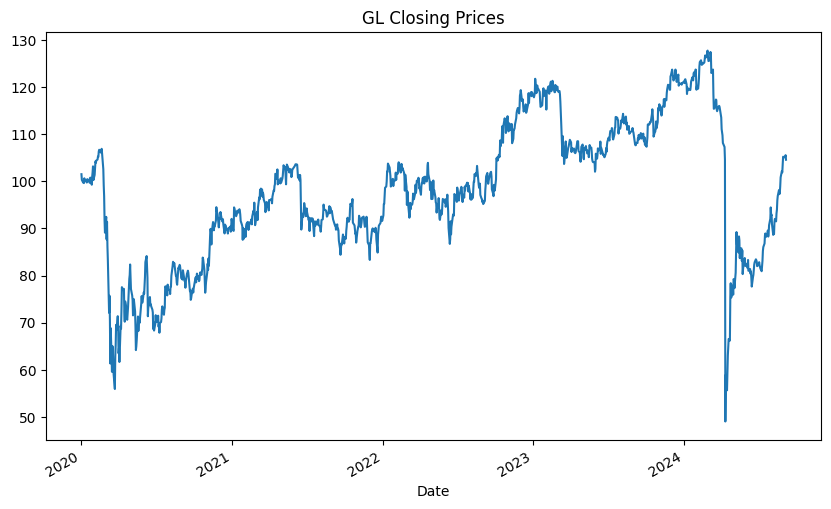

GL historical data downloaded


[*********************100%%**********************]  1 of 1 completed


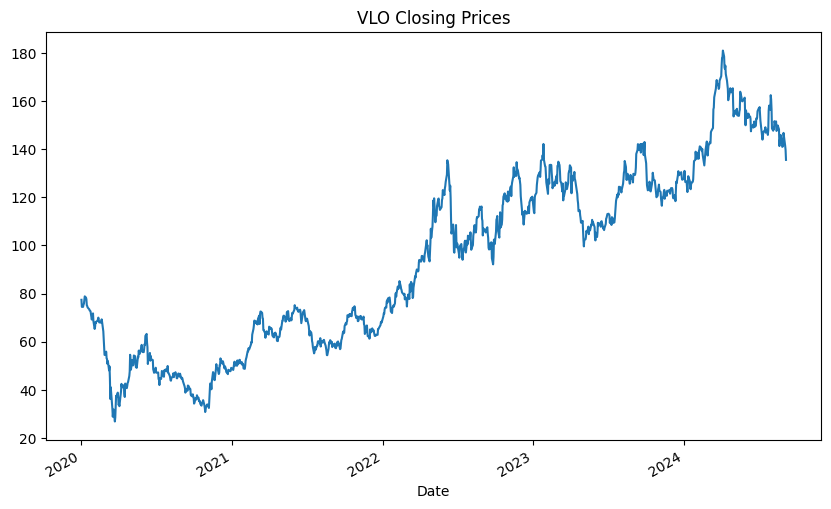

VLO historical data downloaded


[*********************100%%**********************]  1 of 1 completed


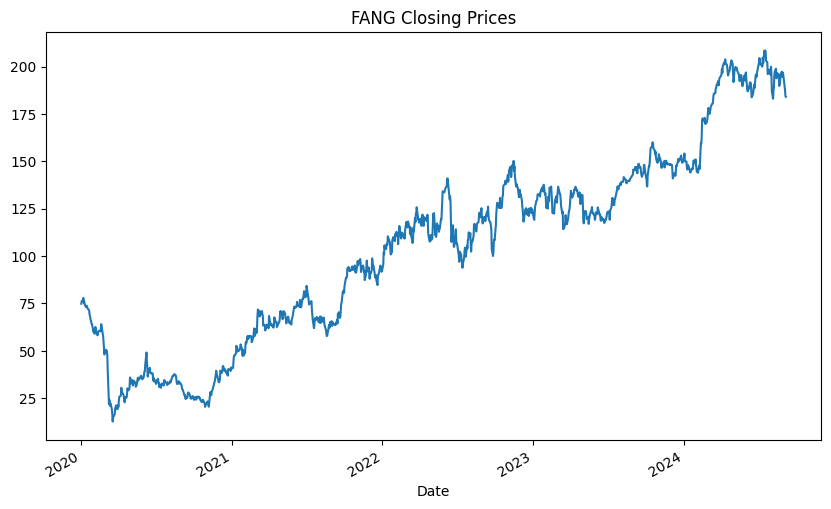

FANG historical data downloaded


[*********************100%%**********************]  1 of 1 completed


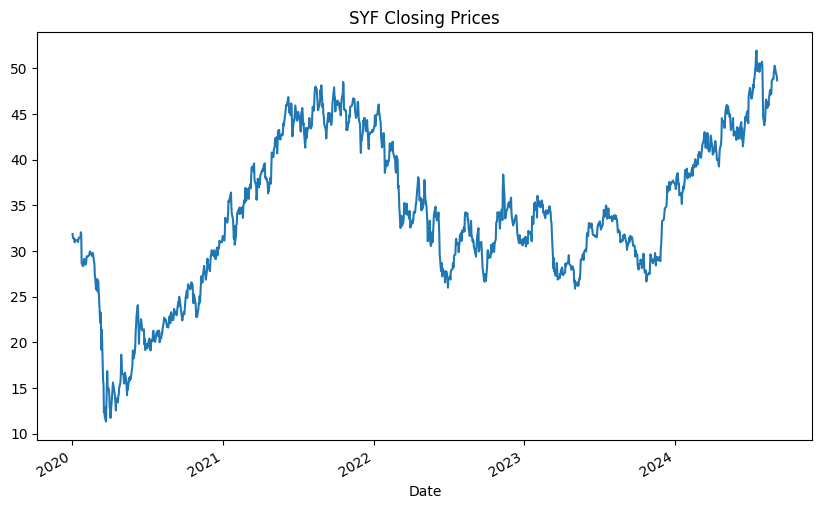

SYF historical data downloaded


[*********************100%%**********************]  1 of 1 completed


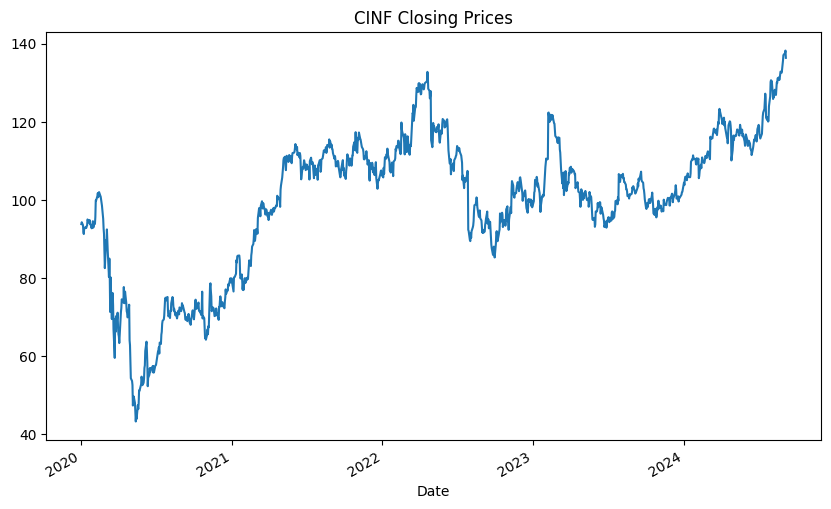

CINF historical data downloaded


[*********************100%%**********************]  1 of 1 completed


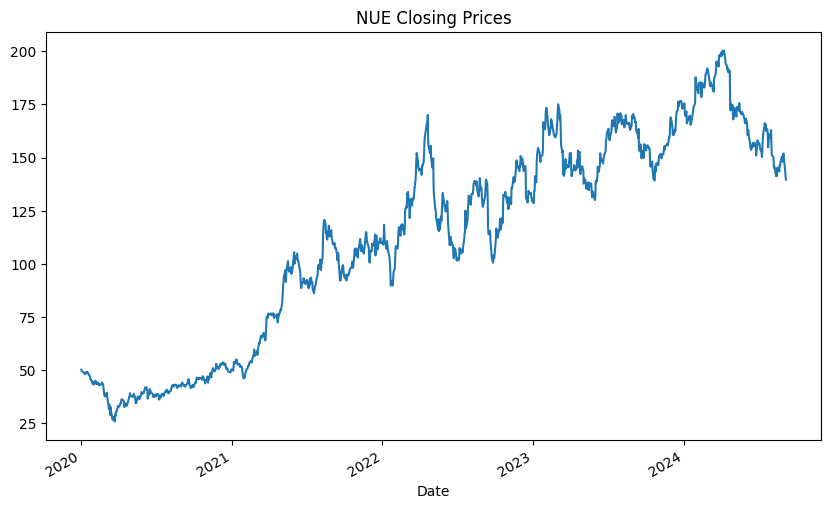

NUE historical data downloaded


[*********************100%%**********************]  1 of 1 completed


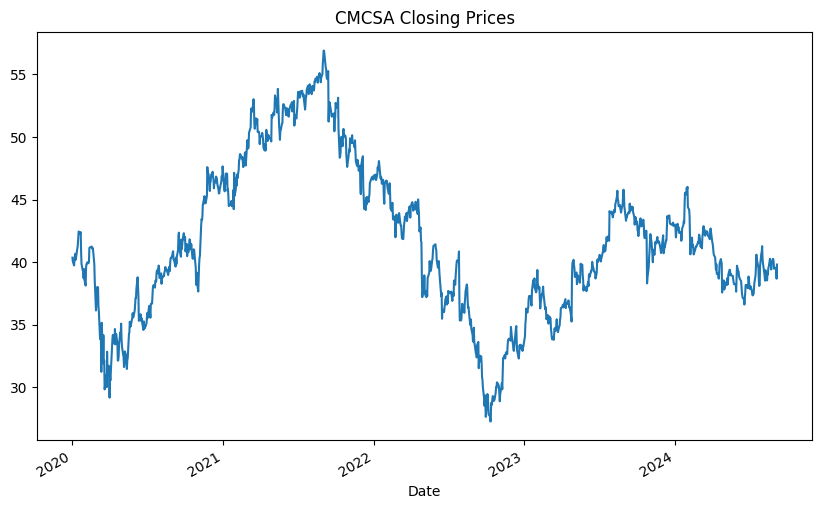

CMCSA historical data downloaded


[*********************100%%**********************]  1 of 1 completed


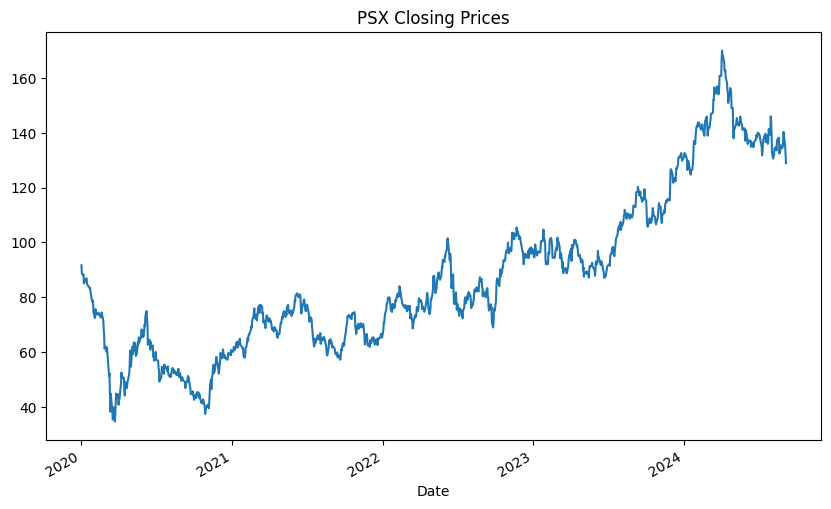

PSX historical data downloaded


[*********************100%%**********************]  1 of 1 completed


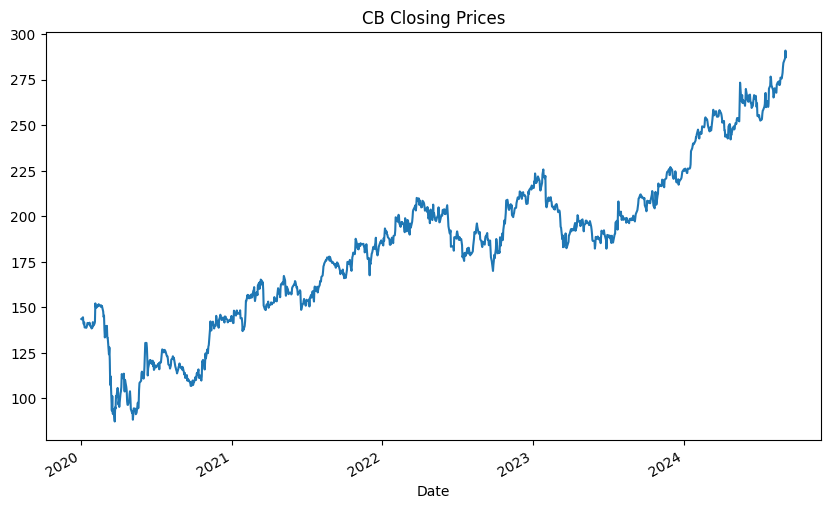

CB historical data downloaded


[*********************100%%**********************]  1 of 1 completed


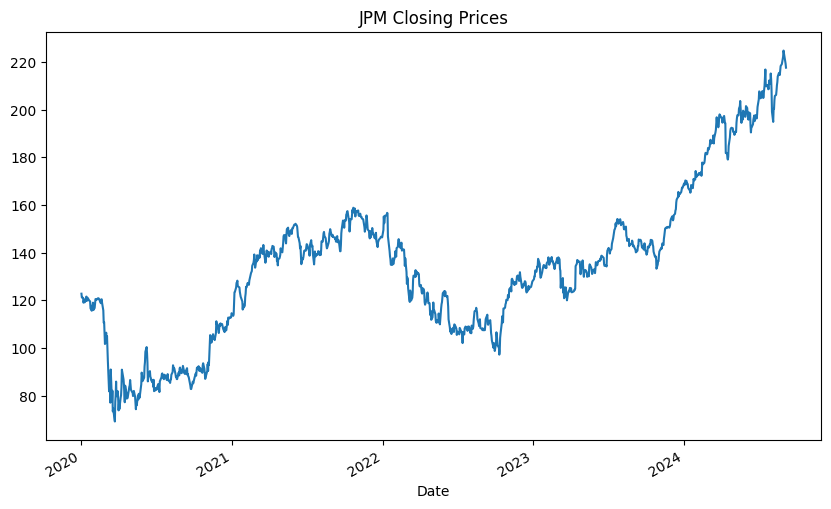

JPM historical data downloaded


[*********************100%%**********************]  1 of 1 completed


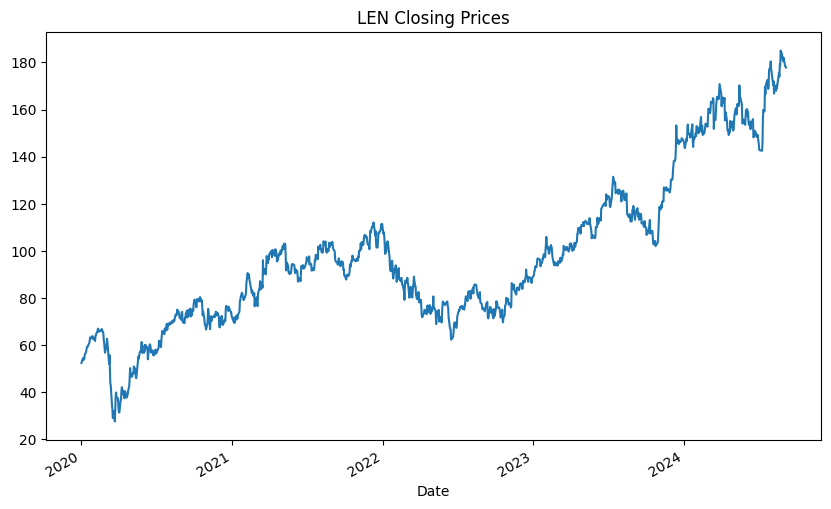

LEN historical data downloaded


In [77]:
for stock in top10_stocks['stock']:
    try:
        stock_data = yf.download(stock, start="2020-01-01")['Adj Close']
        historical_data[stock] = stock_data
        stock_data.plot(figsize=(10,6), title=f'{stock} Closing Prices')
        plt.show()
        print(f'{stock} historical data downloaded')
    except Exception as e:
        print(f'Error downloading data for {stock}: {e}')

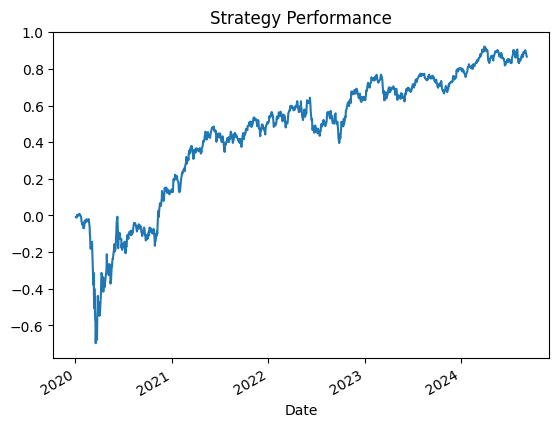

In [78]:
# Calculate Returns
rets_df = historical_data.pct_change().dropna()
rets_df['total_ret'] = rets_df.mean(axis=1)
rets_df['total_ret'].cumsum().plot(title='Strategy Performance')
plt.show()

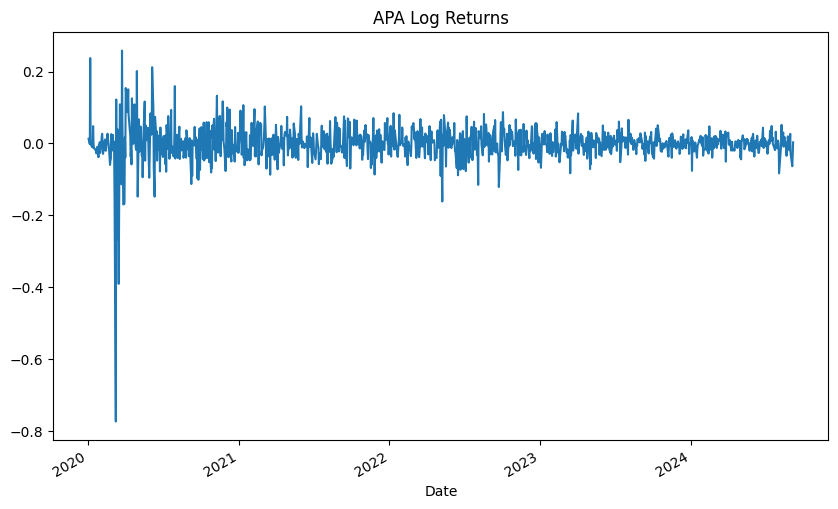

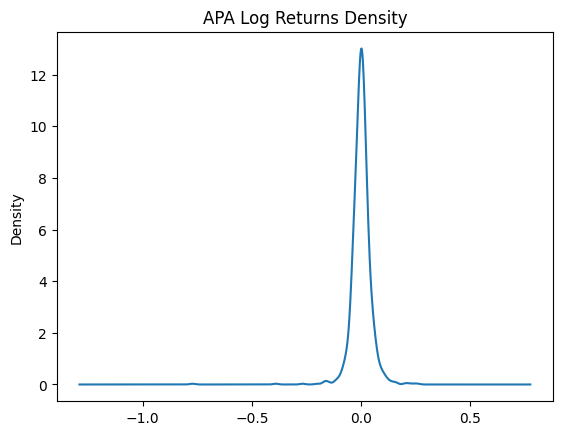

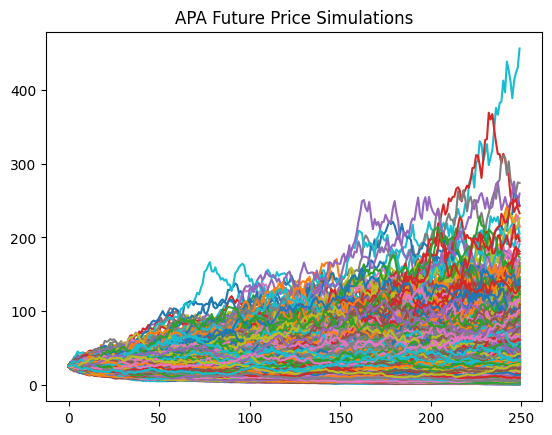

APA Best and Worst Cases
Worst Simulation $/share: 0.9
Avg Simulation $/share: 26.35
Best Simulation $/share: 455.9

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $3.797057537517926 and $48.9
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-18.75 and $71.44
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-41.3 and $93.99


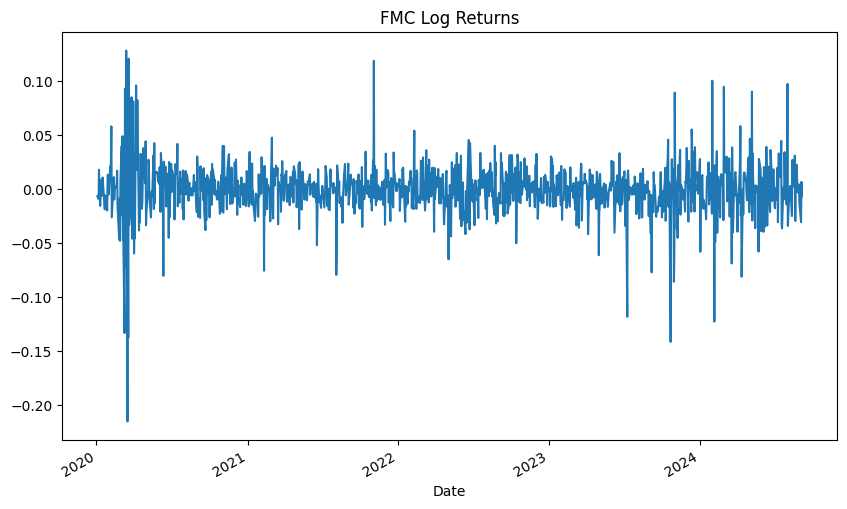

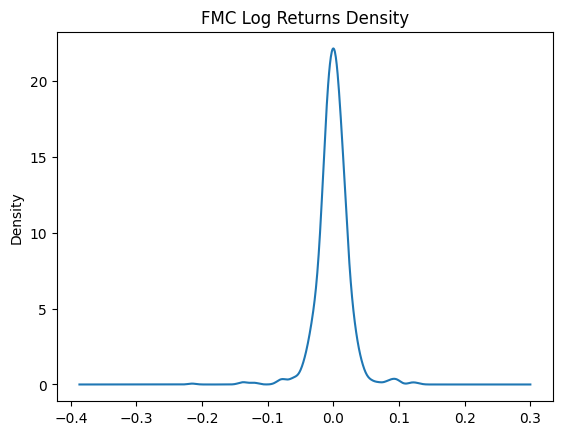

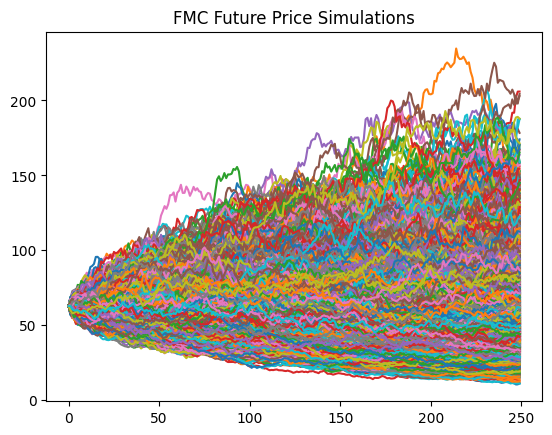

FMC Best and Worst Cases
Worst Simulation $/share: 10.91
Avg Simulation $/share: 57.5
Best Simulation $/share: 205.98

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $34.49573630564625 and $80.51
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $11.49 and $103.51
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-11.52 and $126.52


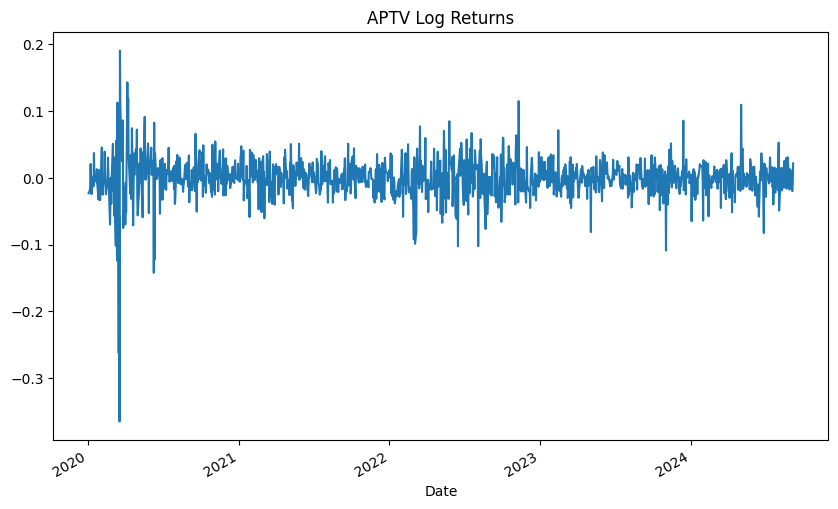

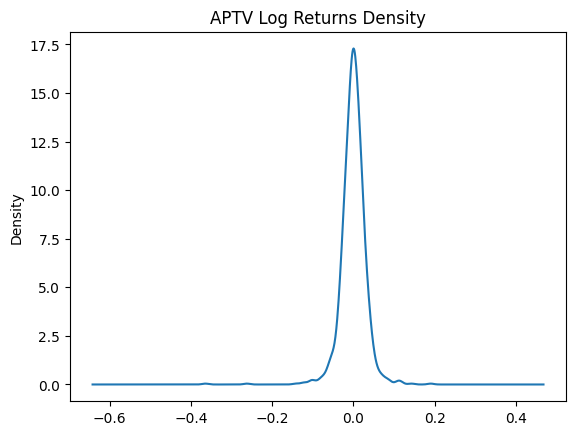

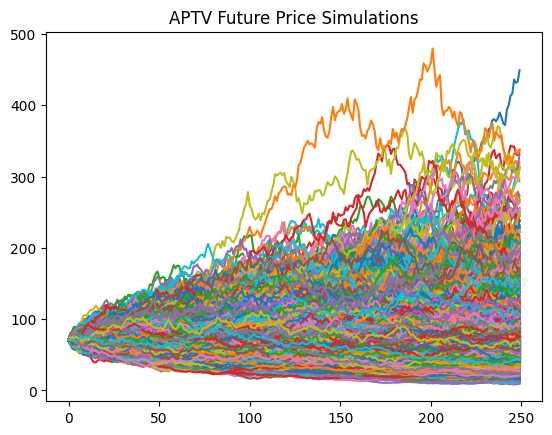

APTV Best and Worst Cases
Worst Simulation $/share: 9.29
Avg Simulation $/share: 65.97
Best Simulation $/share: 449.14

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $31.279560888647417 and $100.66
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-3.41 and $135.35
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-38.1 and $170.05


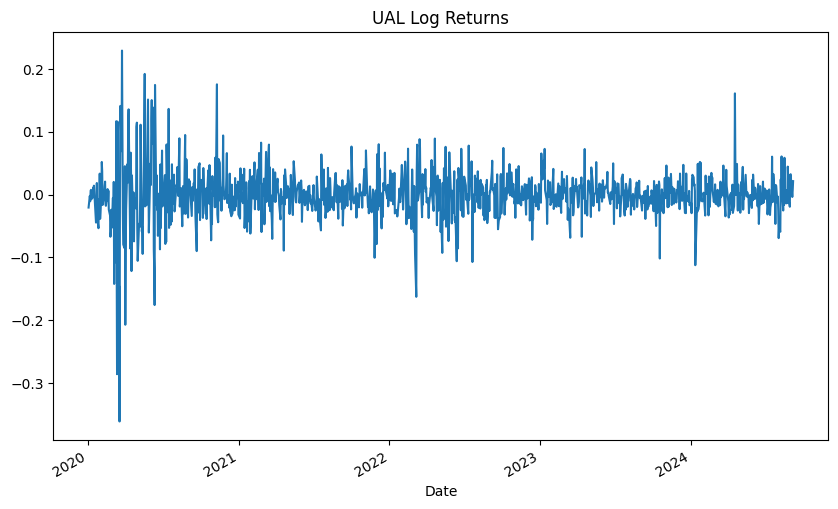

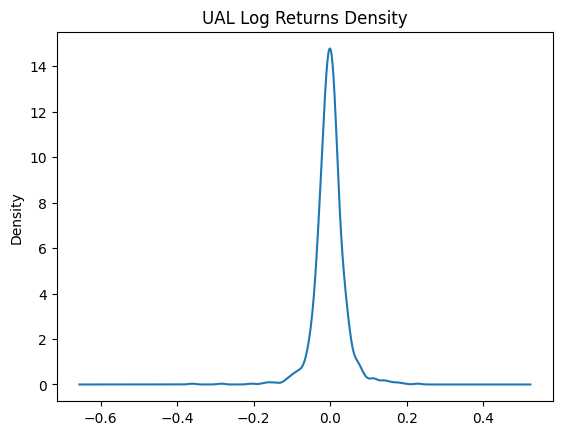

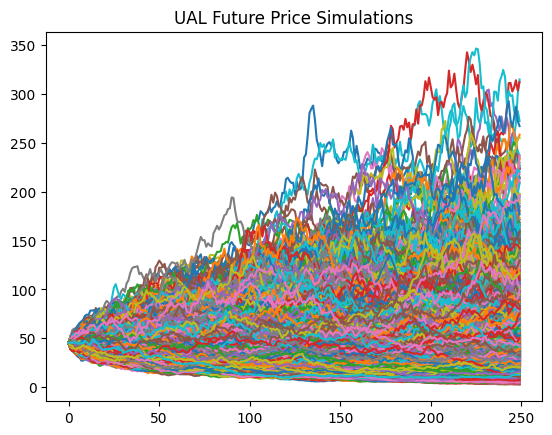

UAL Best and Worst Cases
Worst Simulation $/share: 2.8
Avg Simulation $/share: 39.24
Best Simulation $/share: 314.48

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $11.677173746873653 and $66.8
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-15.88 and $94.36
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-43.45 and $121.93


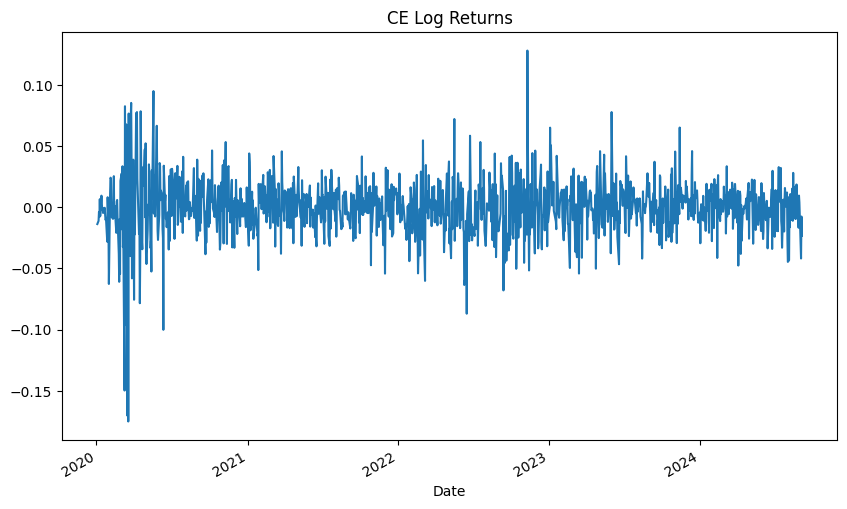

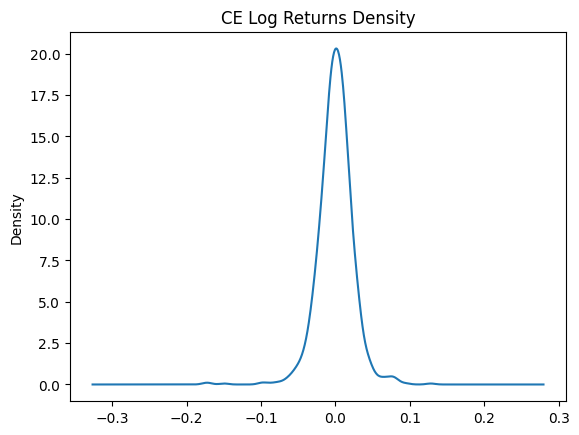

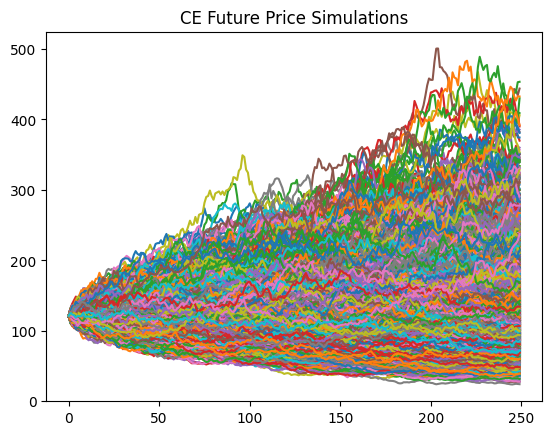

CE Best and Worst Cases
Worst Simulation $/share: 24.24
Avg Simulation $/share: 124.2
Best Simulation $/share: 453.5

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $74.52501715685321 and $173.87
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $24.85 and $223.54
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-24.82 and $273.22


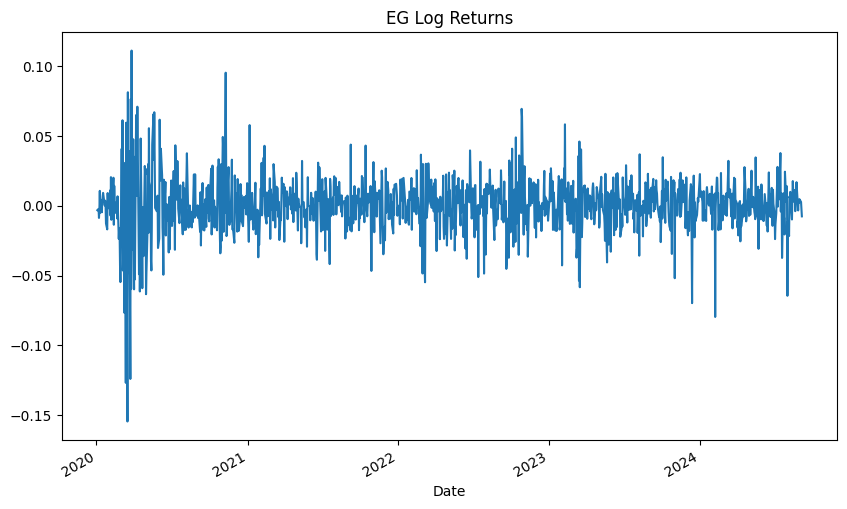

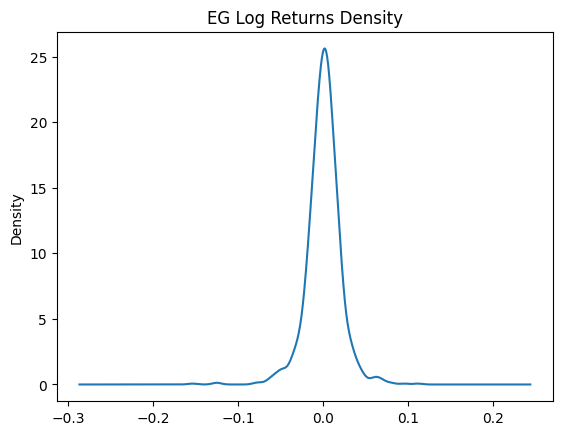

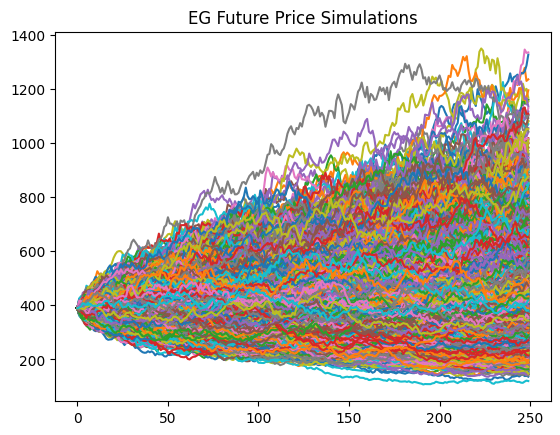

EG Best and Worst Cases
Worst Simulation $/share: 119.66
Avg Simulation $/share: 428.63
Best Simulation $/share: 1336.42

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $287.6722029230706 and $569.6
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $146.71 and $710.56
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $5.75 and $851.52


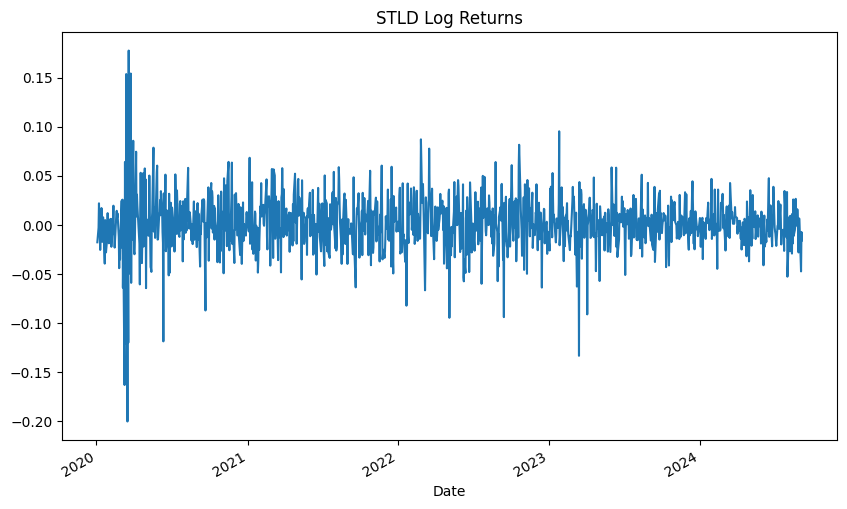

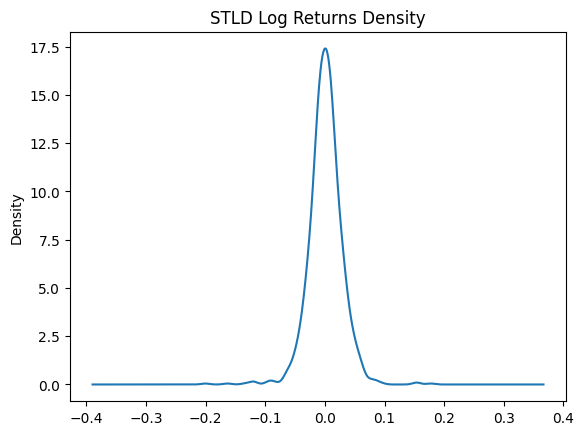

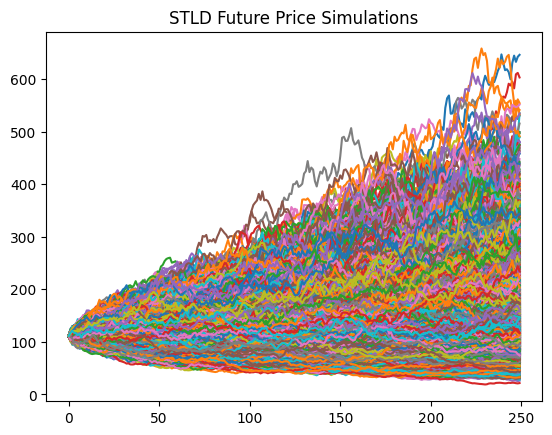

STLD Best and Worst Cases
Worst Simulation $/share: 21.47
Avg Simulation $/share: 146.2
Best Simulation $/share: 646.52

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $78.24246491385972 and $214.16
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $10.28 and $282.12
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-57.68 and $350.08


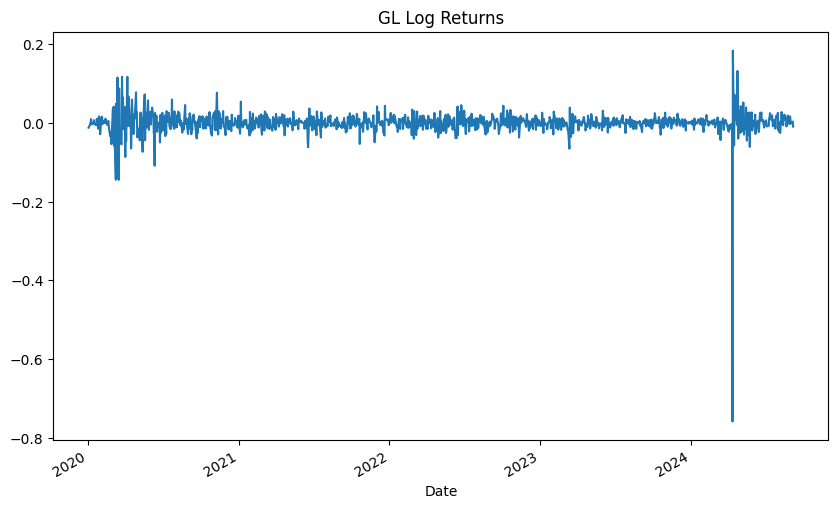

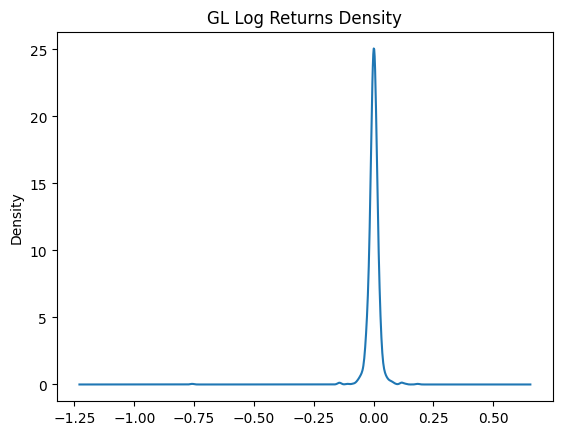

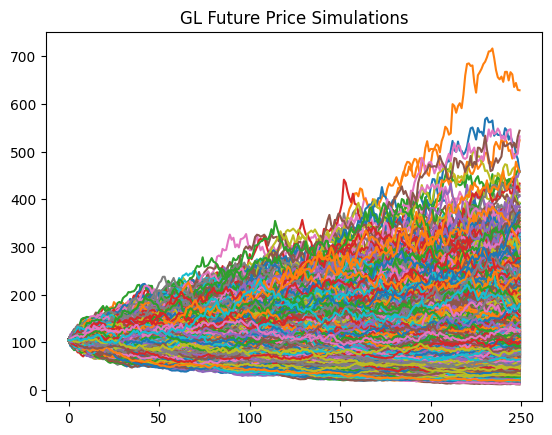

GL Best and Worst Cases
Worst Simulation $/share: 11.62
Avg Simulation $/share: 104.98
Best Simulation $/share: 628.58

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $51.106755147903314 and $158.84
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-2.76 and $212.71
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-56.63 and $266.58


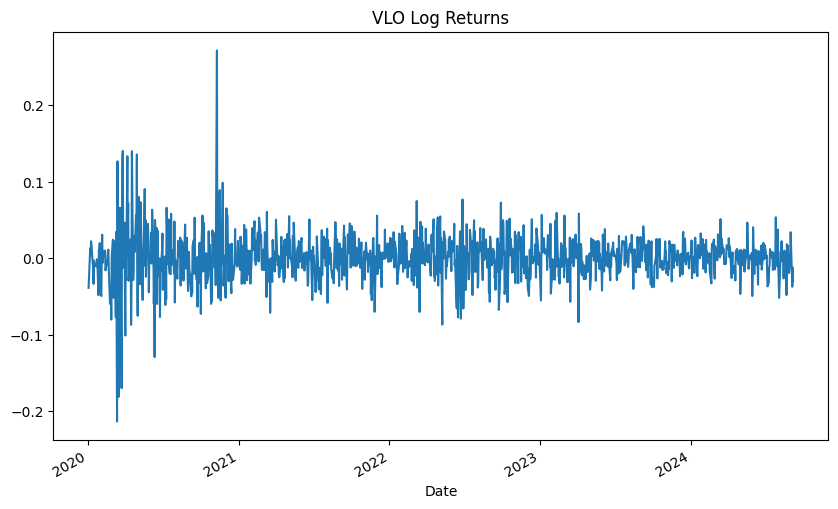

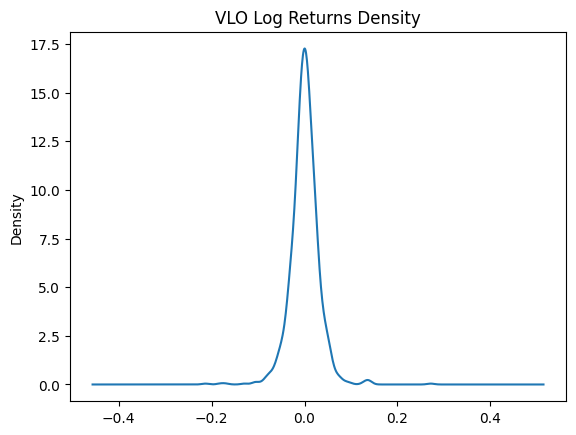

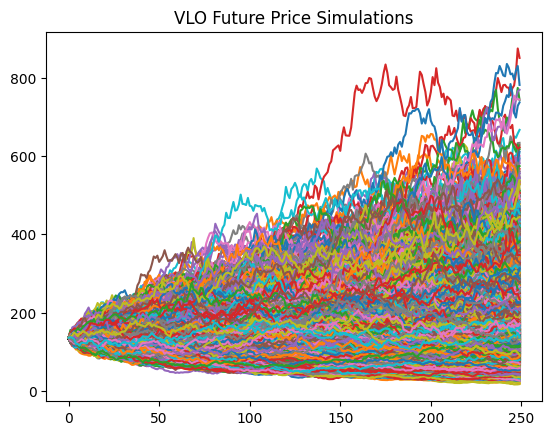

VLO Best and Worst Cases
Worst Simulation $/share: 17.19
Avg Simulation $/share: 152.9
Best Simulation $/share: 850.08

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $72.39628852919553 and $233.41
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-8.11 and $313.91
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-88.61 and $394.42


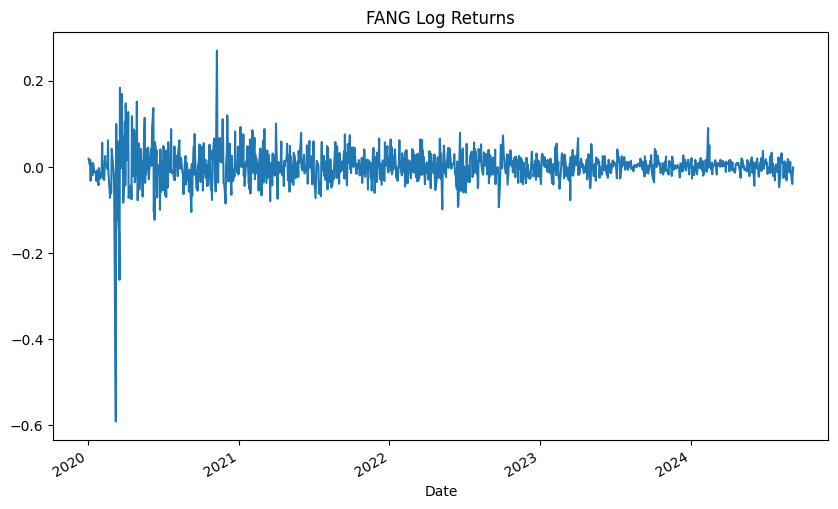

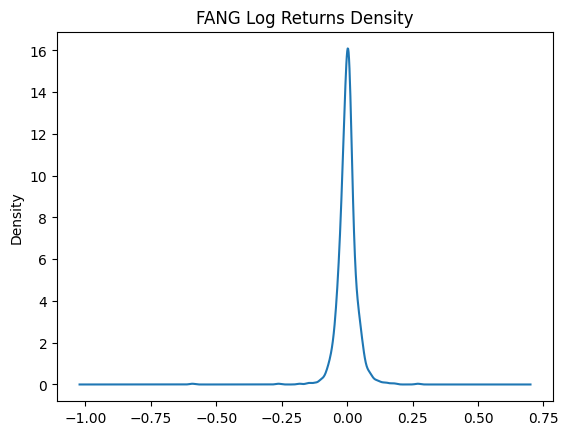

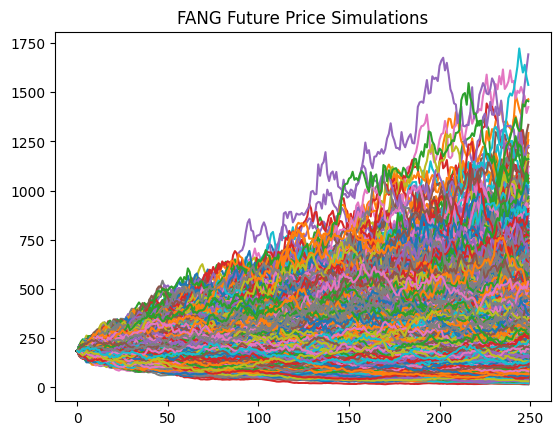

FANG Best and Worst Cases
Worst Simulation $/share: 13.51
Avg Simulation $/share: 223.87
Best Simulation $/share: 1692.57

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $70.90963088744047 and $376.83
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-82.05 and $529.79
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-235.01 and $682.74


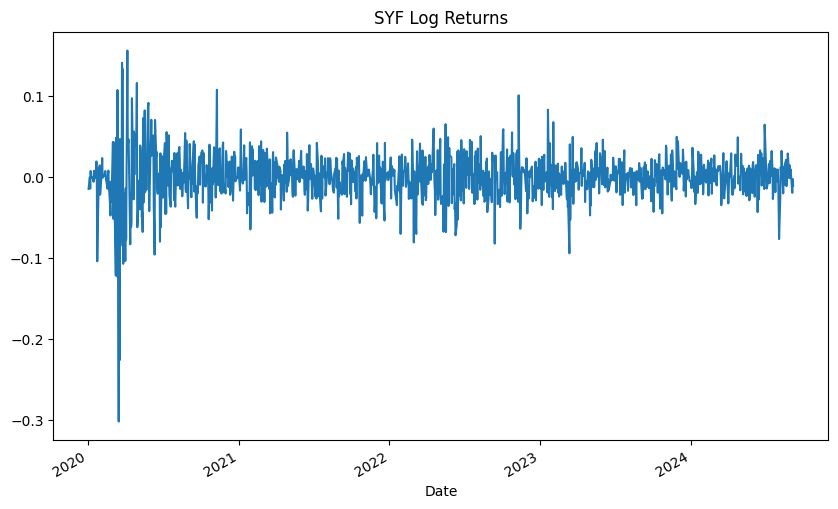

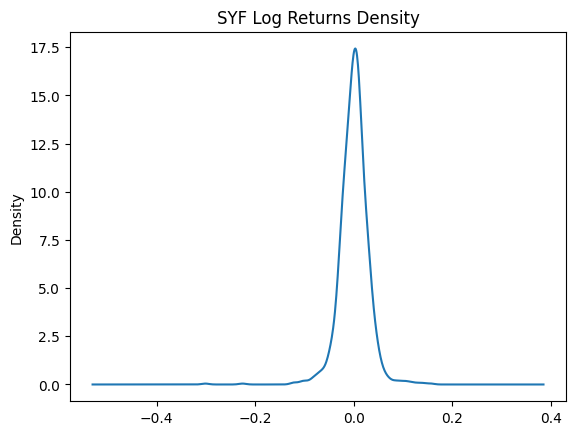

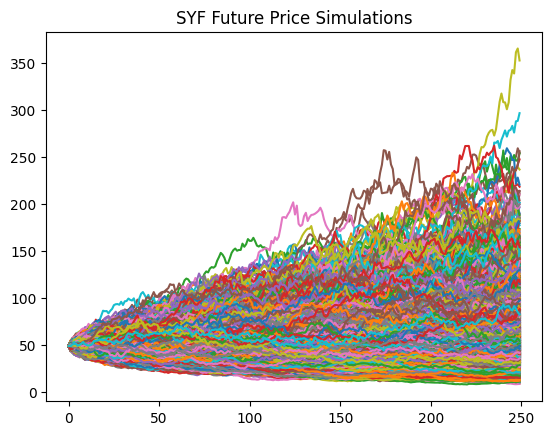

SYF Best and Worst Cases
Worst Simulation $/share: 8.22
Avg Simulation $/share: 53.68
Best Simulation $/share: 352.79

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $26.125985385811273 and $81.24
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-1.43 and $108.79
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-28.99 and $136.35


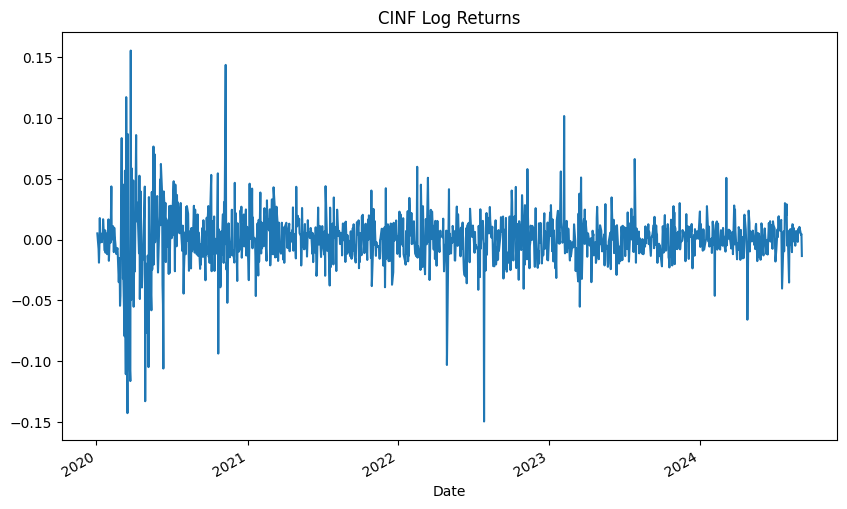

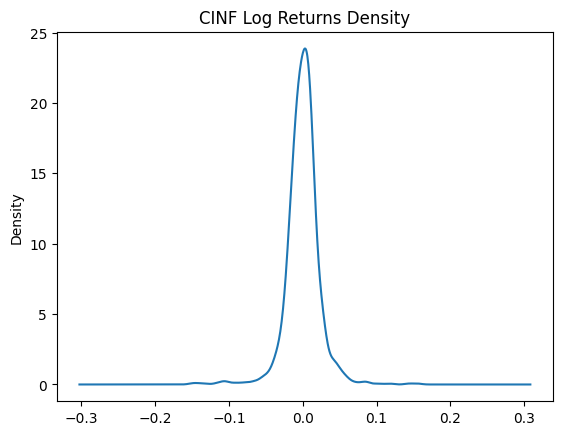

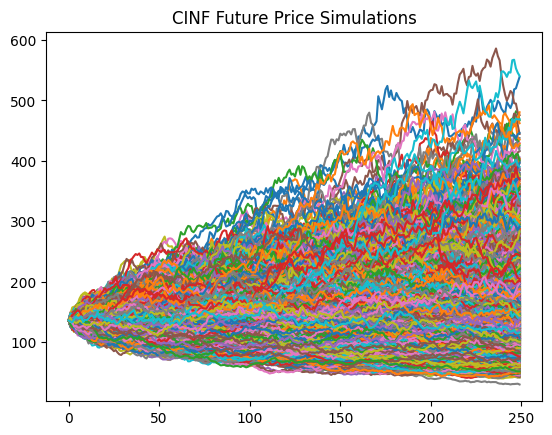

CINF Best and Worst Cases
Worst Simulation $/share: 30.3
Avg Simulation $/share: 148.09
Best Simulation $/share: 540.49

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $92.81137079271798 and $203.36
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $37.54 and $258.63
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-17.74 and $313.91


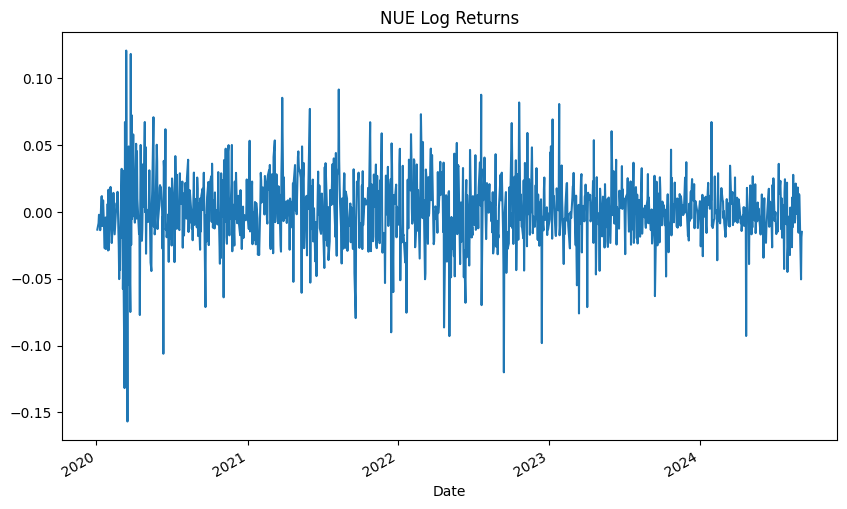

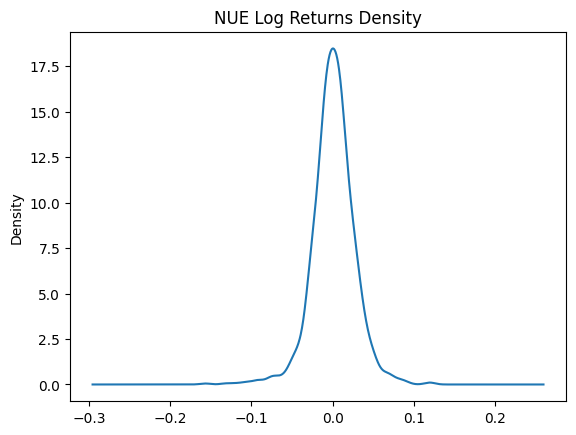

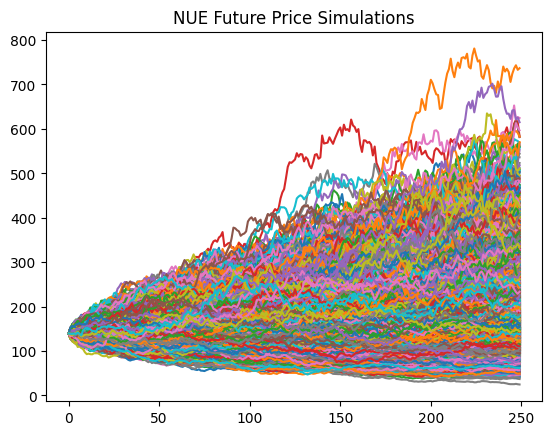

NUE Best and Worst Cases
Worst Simulation $/share: 24.81
Avg Simulation $/share: 172.91
Best Simulation $/share: 736.7

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $98.47649908556745 and $247.35
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $24.04 and $321.79
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-50.4 and $396.23


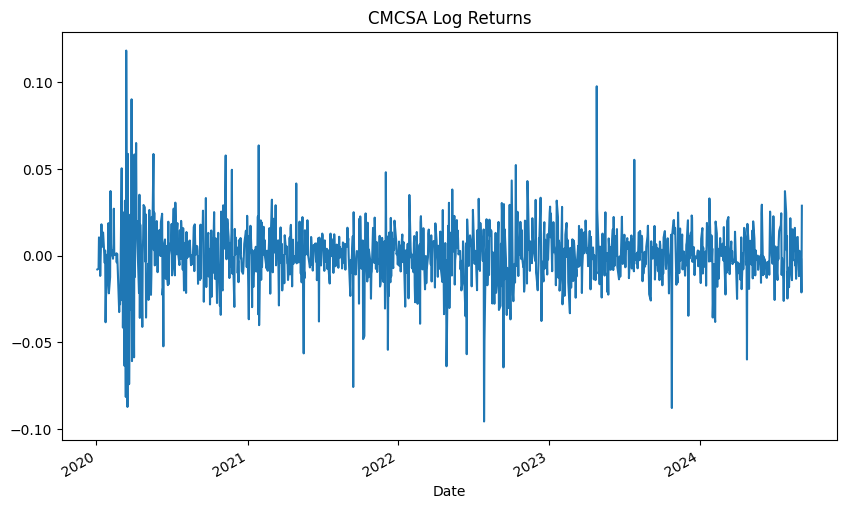

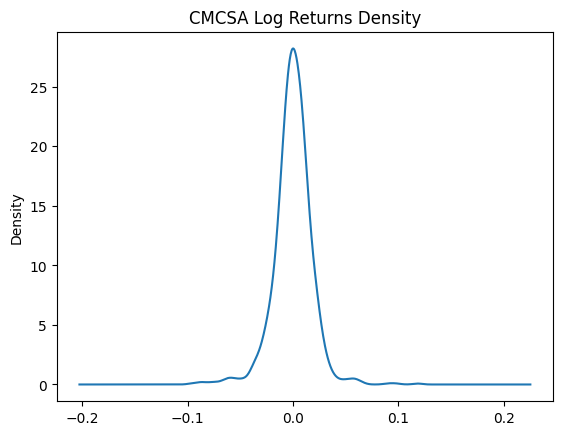

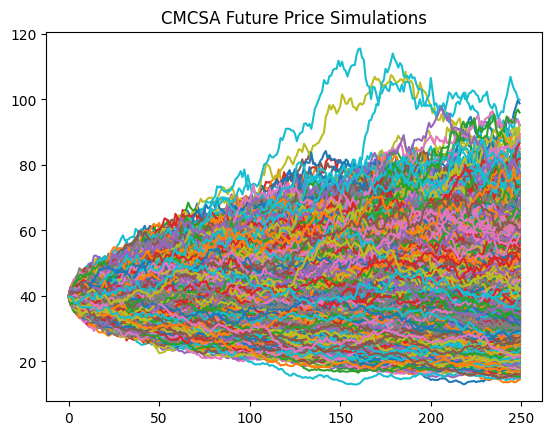

CMCSA Best and Worst Cases
Worst Simulation $/share: 14.46
Avg Simulation $/share: 39.68
Best Simulation $/share: 99.87

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $28.24958033418451 and $51.12
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $16.82 and $62.55
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $5.38 and $73.98


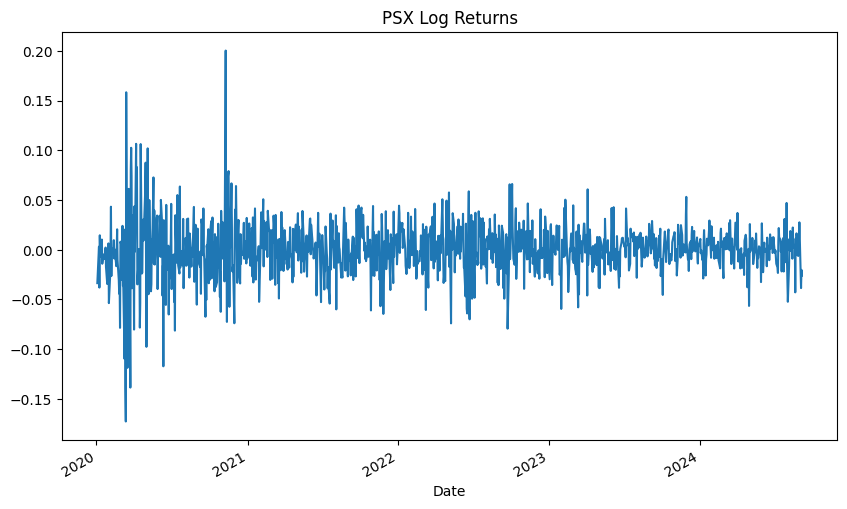

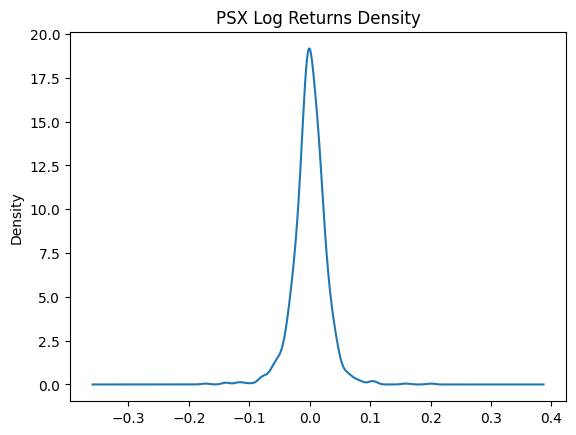

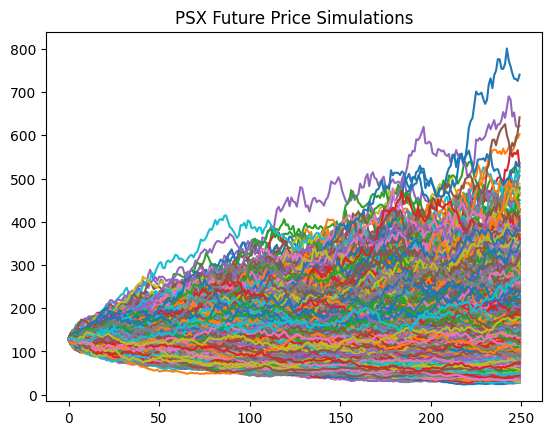

PSX Best and Worst Cases
Worst Simulation $/share: 27.18
Avg Simulation $/share: 138.74
Best Simulation $/share: 740.11

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $76.16375269803802 and $201.31
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $13.59 and $263.89
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-48.99 and $326.46


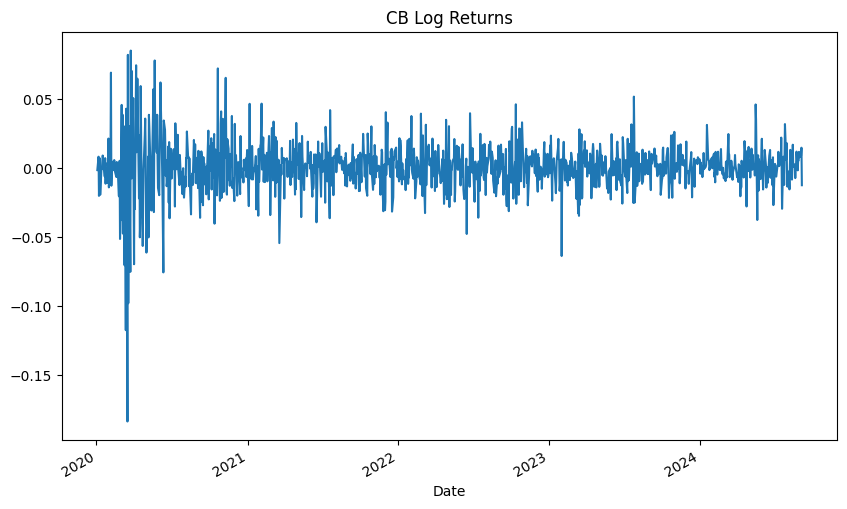

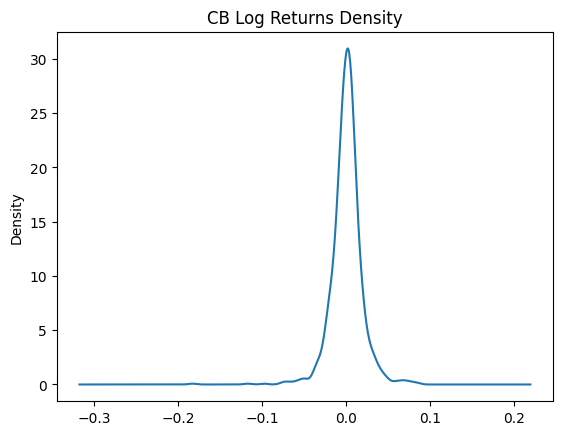

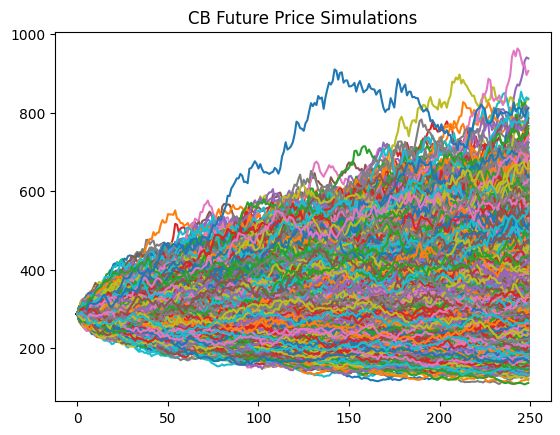

CB Best and Worst Cases
Worst Simulation $/share: 110.97
Avg Simulation $/share: 335.59
Best Simulation $/share: 938.11

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $234.88633237258637 and $436.29
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $134.18 and $536.99
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $33.48 and $637.7


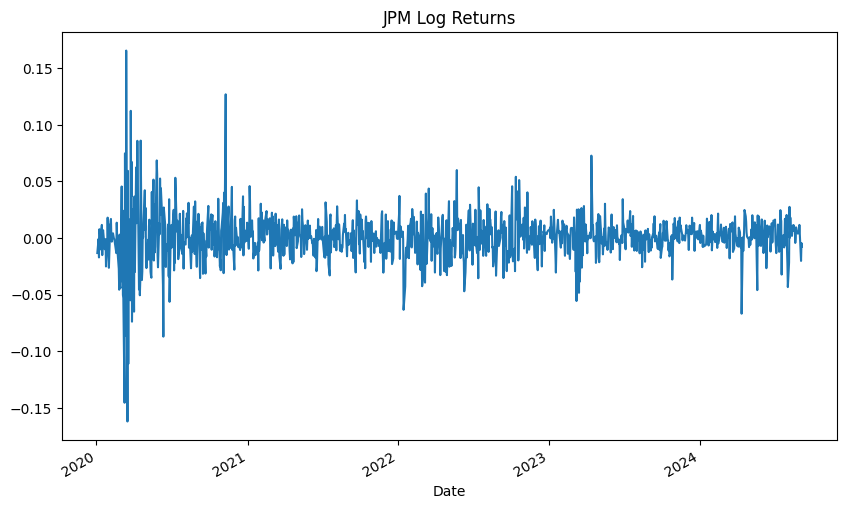

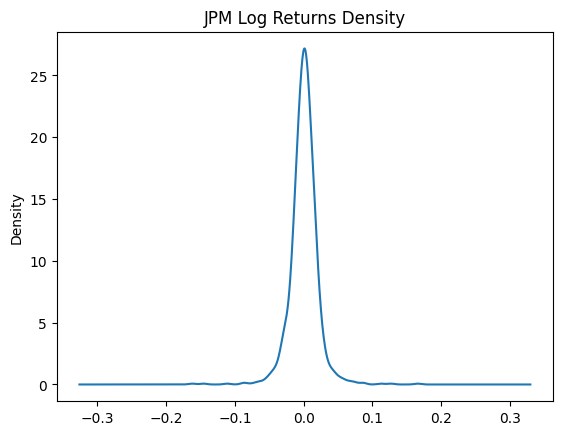

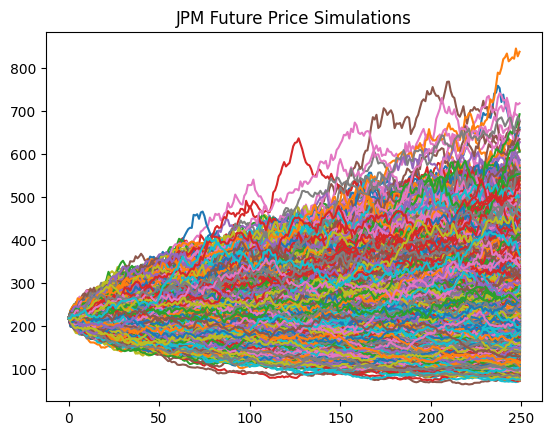

JPM Best and Worst Cases
Worst Simulation $/share: 71.24
Avg Simulation $/share: 244.27
Best Simulation $/share: 838.61

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $163.29096675586246 and $325.25
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $82.31 and $406.23
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $1.33 and $487.21


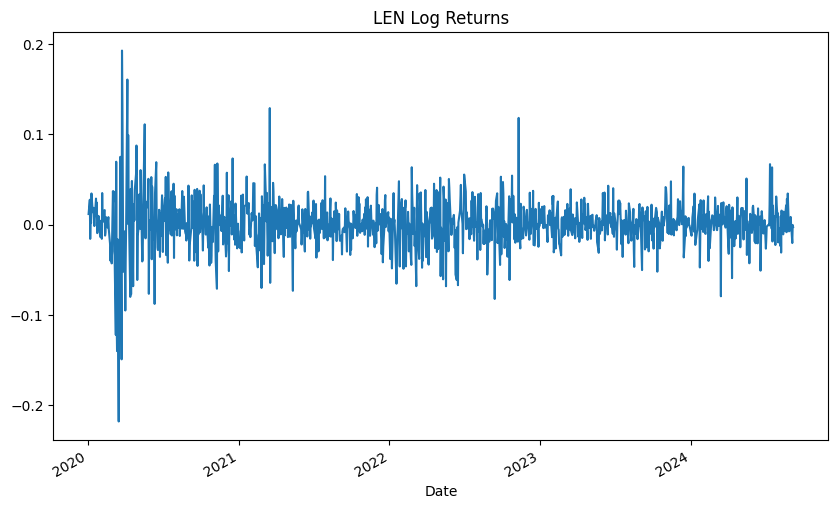

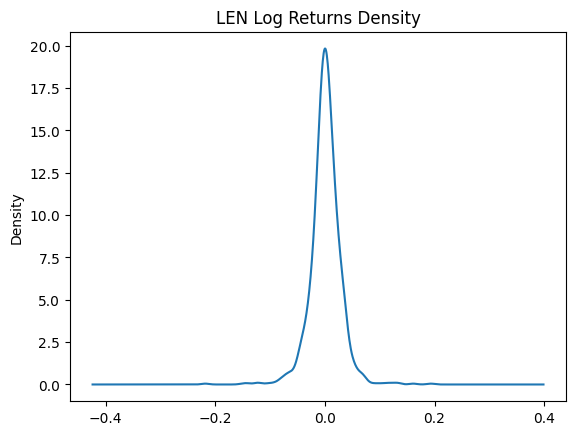

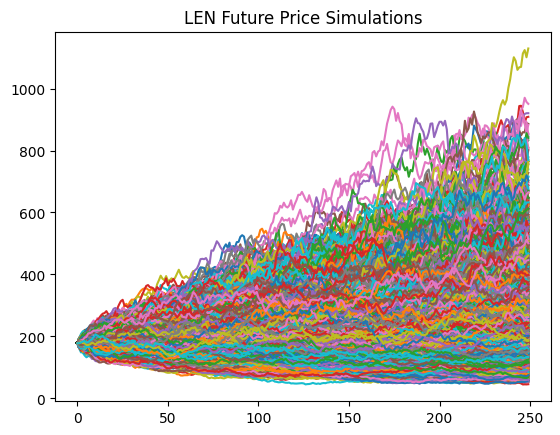

LEN Best and Worst Cases
Worst Simulation $/share: 45.76
Avg Simulation $/share: 231.42
Best Simulation $/share: 1129.24

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $124.46948479597943 and $338.37
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $17.52 and $445.32
3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: $-89.43 and $552.27


In [79]:
# For each stock, calculate log returns, simulate future prices, and plot scenarios
for stock in top10_stocks['stock']:
    stock_data = historical_data[stock].dropna()
    log_returns = np.log(1 + stock_data.pct_change())

    # Plot log returns
    log_returns.plot(figsize=(10,6), title=f'{stock} Log Returns')
    plt.show()

    # Plot distribution of log returns
    log_returns.plot.density(title=f'{stock} Log Returns Density')
    plt.show()

    # Calculate statistics
    mean = log_returns.mean()
    variance = log_returns.var()
    STD = log_returns.std()

    # Simulate future returns
    t_intervals = 250
    simulations = 10000
    drift = mean - (0.5 * variance)
    daily_logreturns_simulated = STD * norm.ppf(np.random.rand(t_intervals, simulations))
    daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift
    daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

    # Simulate future prices
    last_price = stock_data.iloc[-1]
    price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)
    price_list[0] = last_price

    for t in range(1, t_intervals):
        price_list[t] = price_list[t-1] * daily_simplereturns_simulated_withdrift[t]
        
    # Plot simulated future prices
    plt.plot(price_list)
    plt.title(f'{stock} Future Price Simulations')
    plt.show()

    # Quantify scenarios
    WorstSim = round(price_list[-1].min(), 2)
    AvgSim = round(price_list[-1].mean(), 2)
    BestSim = round(price_list[-1].max(), 2)
    print(f'{stock} Best and Worst Cases')
    print(f"Worst Simulation $/share: {WorstSim}")
    print(f"Avg Simulation $/share: {AvgSim}")
    print(f"Best Simulation $/share: {BestSim}")

    Mean_Day250Prices = price_list[-1].mean()
    SD_Day250Prices = price_list[-1].std()
    UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices
    LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
    UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
    LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices
    UpperInterval_3SD = Mean_Day250Prices + 3 * SD_Day250Prices
    LowerInterval_3SD = Mean_Day250Prices - 3 * SD_Day250Prices

    print("\nConfidence Intervals")
    print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${LowerInterval_1SD} and ${round(UpperInterval_1SD, 2)}")
    print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(LowerInterval_2SD, 2)} and ${round(UpperInterval_2SD, 2)}")
    print(f"3 Sigma (3 S.D): 99% confident that price after 250 days will fall between: ${round(LowerInterval_3SD, 2)} and ${round(UpperInterval_3SD, 2)}")


# Exploratory Prices

In [80]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Expected returns and covariance matrix
expected_returns = rets_df.mean() * 250  # Annualized expected returns
cov_matrix = rets_df.cov() * 250  # Annualized covariance matrix

def portfolio_performance(weights, expected_returns, cov_matrix, rf_rate=0.01):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - rf_rate) / portfolio_stddev
    return portfolio_return, portfolio_stddev, sharpe_ratio

def negative_sharpe_ratio(weights, expected_returns, cov_matrix, rf_rate=0.01):
    return -portfolio_performance(weights, expected_returns, cov_matrix, rf_rate)[2]

def optimize_portfolio(expected_returns, cov_matrix, rf_rate=0.01):
    num_assets = len(expected_returns)
    args = (expected_returns, cov_matrix, rf_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

opt_result = optimize_portfolio(expected_returns, cov_matrix)
opt_weights = opt_result.x

# Fetch the current stock prices
def get_current_price(stock):
    try:
        ticker = yf.Ticker(stock)
        return ticker.info.get('currentPrice', None)
    except Exception as e:
        print(f'Error fetching data for {stock}: {e}')
        return None

# Retrieve current prices for the top10 stocks
top10_stocks['currentPrice'] = top10_stocks['stock'].apply(get_current_price)

# Remove stocks where the current price could not be retrieved
top10_stocks = top10_stocks.dropna(subset=['currentPrice'])

# Ensure opt_weights corresponds to the filtered stocks
available_stocks = top10_stocks['stock'].tolist()
opt_weights = [w for s, w in zip(top10_stocks['stock'], opt_weights) if s in available_stocks]

# Define your budgets
budgets = [100000, 10000, 1000]

# Calculate and display the allocation for each budget
for budget in budgets:
    top10_stocks['Weight'] = opt_weights
    top10_stocks['Allocation'] = top10_stocks['Weight'] * budget
    top10_stocks['Shares to Buy'] = np.round(top10_stocks['Allocation'] / top10_stocks['currentPrice']).astype(int)
    
    print(f"\nPortfolio Allocation for Budget ${budget}:")
    print(top10_stocks[['stock', 'Weight', 'currentPrice', 'Allocation', 'Shares to Buy']])



Portfolio Allocation for Budget $100000:
     stock        Weight  currentPrice    Allocation  Shares to Buy
38     APA  2.294691e-16         25.97  2.294691e-11              0
200    FMC  1.874115e-16         62.66  1.874115e-11              0
41    APTV  0.000000e+00         70.97  0.000000e+00              0
462    UAL  6.531293e-16         45.12  6.531293e-11              0
96      CE  5.024393e-16        121.44  5.024393e-11              0
181     EG  0.000000e+00        389.50  0.000000e+00              0
427   STLD  3.521280e-01        111.32  3.521280e+04            316
221     GL  1.565388e-16        104.58  1.565388e-11              0
467    VLO  0.000000e+00        135.52  0.000000e+00              0
148   FANG  1.201953e-01        184.01  1.201953e+04             65
431    SYF  0.000000e+00         48.67  0.000000e+00              0
109   CINF  0.000000e+00        136.34  0.000000e+00              0
349    NUE  0.000000e+00        139.60  0.000000e+00              0
120  C

In [70]:
# Fetch additional information for a ticker
def fetch_ticker_details(ticker):
    try:
        info = ticker.info
        sustainability = ticker.sustainability
        recommendations = ticker.recommendations
        upgrades_downgrades = ticker.upgrades_downgrades
        return info, sustainability, recommendations, upgrades_downgrades
    except Exception as e:
        print(f'Error fetching details for {ticker.ticker}: {e}')
        return None, None, None, None


In [81]:
for _, row in top10_stocks[top10_stocks['Shares to Buy'] > 0].iterrows():
    ticker = yf.Ticker(row['stock'])
    info, sustainability, recommendations, upgrades_downgrades = fetch_ticker_details(ticker)
    
    print(f"\nDetails for {row['stock']}:")
    print("\nRecommendations Summary:")
    print(recommendations)
    #print("\nSustainability:")
    #print(sustainability)
    #print("Info:")
    #print(info)
    #print("\nUpgrades and Downgrades:")
    #print(upgrades_downgrades)



Details for STLD:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          3    6     4     0           0
1    -1m          1    1     7     3           1
2    -2m          1    1     7     3           1
3    -3m          1    7     2     0           0


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FANG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FANG&crumb=NLdzHcdBe5u



Details for FANG:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          9   19     2     0           0
1    -1m          4   18     6     0           0
2    -2m          4   18     5     0           0
3    -3m          4   20     4     1           0

Details for LEN:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          7    6     9     0           0
1    -1m          3    9     9     1           0
2    -2m          4   10     6     1           1
3    -3m          6    4    12     0           0


In [82]:
for _, row in top10_stocks.iterrows():
    ticker = yf.Ticker(row['stock'])
    info, sustainability, recommendations, upgrades_downgrades = fetch_ticker_details(ticker)
    
    print(f"\nDetails for {row['stock']}:")
    print("\nRecommendations Summary:")
    print(recommendations)
    #print("\nSustainability:")
    #print(sustainability)
    #print("Info:")
    #print(info)
    #print("\nUpgrades and Downgrades:")
    #print(upgrades_downgrades)



Details for APA:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          2    5    14     6           2
1    -1m          4    7    15     5           0
2    -2m          3    8    14     5           0
3    -3m          4    7    16     1           0

Details for FMC:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          3   10     8     0           0
1    -1m          1    8    11     1           0
2    -2m          1    8    10     1           0
3    -3m          4   10     6     0           0

Details for APTV:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          0    0     0     0           0
1    -1m          8   11     4     3           0
2    -2m          8   12     4     2           0
3    -3m          6   10     8     2           0

Details for UAL:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          2    4    11     1   

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FANG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FANG&crumb=NLdzHcdBe5u



Details for FANG:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          9   19     2     0           0
1    -1m          4   18     6     0           0
2    -2m          4   18     5     0           0
3    -3m          4   20     4     1           0

Details for SYF:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          5   10     6     0           0
1    -1m          5    7    10     1           0
2    -2m          3    7     9     1           0
3    -3m          2    6    10     1           1

Details for CINF:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          0    1     5     1           0
1    -1m          2    4     5     0           0
2    -2m          1    4     6     0           0
3    -3m          1    2     4     0           0

Details for NUE:

Recommendations Summary:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          4    4     6     0  

In [67]:
from tabulate import tabulate

# Get ticker information
EG = yf.Ticker('EG')
EG_info = EG.info

# Convert the dictionary to a DataFrame
EG_df = pd.DataFrame(list(EG_info.items()), columns=['Field', 'Value'])

# Print the DataFrame as a table using tabulate
print(tabulate(EG_df, headers='keys', tablefmt='grid'))

+-----+------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [68]:
# Get ticker information
EG = yf.Ticker('EG')
EG_info = EG.sustainability
EG_info

esgScores
maxAge                                                                         86400
totalEsg                                                                       17.96
environmentScore                                                                1.39
socialScore                                                                     6.67
governanceScore                                                                 9.91
ratingYear                                                                      2023
ratingMonth                                                                        9
highestControversy                                                               1.0
peerCount                                                                         97
esgPerformance                                                            UNDER_PERF
peerGroup                                                                  Insurance
relatedControversy                                              [Customer Incidents]
peerEsgScorePerformance            {'min': 10.69, 'avg': 21.16371134020618, 'max'...
peerGovernancePerformance          {'min': 4.95, 'avg': 10.208510638297872, 'max'...
peerSocialPerformance              {'min': 3.98, 'avg': 9.341170212765958, 'max':...
peerEnvironmentPerformance         {'min': 0.03, 'avg': 1.3230851063829796, 'max'...
peerHighestControversyPerformance  {'min': 0.0, 'avg': 1.4123711340206186, 'max':...
percentile                                                                     20.35
environmentPercentile                                                           None
socialPercentile                                                                None
governancePercentile                                                            None
adult                                                                          False
alcoholic                                                                      False
animalTesting                                                                  False
catholic                                                                       False
controversialWeapons                                                           False
smallArms                                                                      False
furLeather                                                                     False
gambling                                                                       False
gmo                                                                            False
militaryContract                                                               False
nuclear                                                                        False
pesticides                                                                     False
palmOil                                                                        False
coal                                                                           False
tobacco                                                                        False